In [1]:
import pandas as  pd
import numpy as np
import json

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pprint
import pymongo
from pymongo import MongoClient, GEO2D

In [3]:
client = MongoClient('mongodb://localhost:27017/')
client.list_database_names()

['admin', 'config', 'instore', 'isla', 'local']

In [4]:
db = client.instore

In [5]:
#to view list of collections in db
db.list_collection_names()

['Basemap', 'Tracks', 'POS_datas', 'Storeline']

In [6]:
collection = db.Basemap
collection1 = db.Tracks
collection2 = db.POS_datas
collection3 =db.Storeline

In [7]:
#Count number of json datas inside the collections
print(collection.count_documents({}))
print(collection1.count_documents({}))
print(collection2.count_documents({}))
print(collection3.count_documents({}))

1
1
63
1


In [8]:
from pandas.io.json import json_normalize

# Basemap

In [9]:
locations = collection.find_one()

In [10]:
df_Basemap = json_normalize(locations["features"])

In [30]:
df_Basemap.shape

(331, 15)

In [11]:
coords = 'geometry.coordinates'

In [12]:
df2_Basemap = (df_Basemap[coords].apply(lambda r: [(i[0],i[1]) for i in r[0]])
           .apply(pd.Series).stack()
           .reset_index(level=1).rename(columns={0:coords,"level_1":"point"})
           .join(df_Basemap.drop(coords,1), how='left')).reset_index(level=0)

In [13]:
df2_Basemap[['lat','long']] = df2_Basemap[coords].apply(pd.Series)

In [14]:
df2_Basemap.head()

index  point                               geometry.coordinates     type  \
0      0      0  ([-82.685367, 27.846017], [-82.684349, 27.8460...  Feature   
1      1      0  ([-82.685439, 27.84485], [-82.685439, 27.845145])  Feature   
2      2      0  ([-82.684752, 27.845144], [-82.684752, 27.8454...  Feature   
3      3      0  ([-82.685254, 27.845298], [-82.685254, 27.8455...  Feature   
4      4      0   ([-82.684999, 27.8453], [-82.684999, 27.845501])  Feature   

   properties.id properties.StoreName properties.AreaId properties.fillcolor  \
0            901            WalmartSC              None              #FFE8DE   
1            315                 None              None              #FFEEDE   
2            321                 None              None              #FFEEDE   
3            317                 None              None              #FFEEDE   
4            318                 None              None              #FFEEDE   

  properties.Zipcode properties.Name  properties.UFID properties.Aisle  \
0               None            None              NaN             None   
1               None       Checkouts              1.0             None   
2               None          Ladies              2.0             None   
3               None             Men              3.0             None   
4               None  WinterClothing              4.0             None   

  properties.DeptID properties.CatID properties.GeofenceID properties.Address  \
0              None             None                  None               None   
1              None             None                  None               None   
2              None             None                  None               None   
3              None             None                  None               None   
4              None             None                  None               None   

  geometry.type                      lat                     long  
0  MultiPolygon  [-82.685367, 27.846017]  [-82.684349, 27.846004]  
1  MultiPolygon   [-82.685439, 27.84485]  [-82.685439, 27.845145]  
2  MultiPolygon  [-82.684752, 27.845144]  [-82.684752, 27.845495]  
3  MultiPolygon  [-82.685254, 27.845298]  [-82.685254, 27.845501]  
4  MultiPolygon    [-82.684999, 27.8453]  [-82.684999, 27.845501]

# Tracks

In [15]:
locations1 = collection1.find_one()

In [16]:
df_Tracks = json_normalize(locations1["features"])

In [17]:
df_Tracks.head(2)

type     properties.time properties.Name properties.Category  \
0  Feature  12/13/2020 6:36:28            P1T1                       
1  Feature  12/13/2020 6:36:30            P1T1                       

  properties.Department properties.POS  properties.Shelf_id  properties.lon  \
0                                                         0      -82.685587   
1                                                         0      -82.685572   

   properties.lat geometry.type       geometry.coordinates  
0       27.845584         Point  [-82.6855872, 27.8455835]  
1       27.845584         Point  [-82.6855724, 27.8455835]

# POS_datas

In [18]:
datapoints = list(collection2.find({}))
df3 = json_normalize(datapoints)

In [19]:
df3.head()

_id Customer ID Customer Name  Transaction ID  \
0  604732d3be0374e2998403a7        P1T1          P1T1    1.234040e+19   
1  604732d3be0374e2998403a8        P1T1          P1T1    1.234040e+19   
2  604732d3be0374e2998403a9        P1T1          P1T1    1.234040e+19   
3  604732d3be0374e2998403aa        P1T1          P1T1    1.234040e+19   
4  604732d3be0374e2998403ab        P1T1          P1T1    1.234040e+19   

  Transaction Date Begin Timestamp End Timestamp  Item ID  \
0       12/13/2020      6:55:22 AM    6:55:31 AM     1111   
1       12/13/2020      6:55:22 AM    6:55:31 AM     1112   
2       12/13/2020      6:55:22 AM    6:55:31 AM     1113   
3       12/13/2020      6:55:22 AM    6:55:31 AM     1114   
4       12/13/2020      6:55:22 AM    6:55:31 AM     1115   

                               Item  Quantity Price $ Total price $  Dept ID  \
0      Pampers diaper XXXL 20 count         1   $7.98         $7.98        4   
1   Kellogs almond honey cornflakes         1   $5.00         $5.00        3   
2              Gouda Cheddar cheese         2   $2.78         $5.56        1   
3  Mason vegan chocolate peanut bar         1   $4.25         $4.25        2   
4                   Kodo millet 1lb         1   $1.58         $1.58        7   

   Dept Name  Category ID Category Name  
0    Infants          401          Baby  
1  Groceries          301        Cereal  
2     Cheese          101       Cheddar  
3      Dairy          201     Chocolate  
4    Produce          701           Dry

# Storeline

In [20]:
locations3 = collection3.find_one()

In [21]:
df_Storeline = json_normalize(locations3["features"])

In [22]:
coords = 'geometry.coordinates'

In [23]:
df2_Storeline = (df_Storeline[coords].apply(lambda r: [(i[0],i[1]) for i in r[0]])
           .apply(pd.Series).stack()
           .reset_index(level=1).rename(columns={0:coords,"level_1":"point"})
           .join(df_Storeline.drop(coords,1), how='left')).reset_index(level=0)

In [24]:
df2_Storeline[['lat','long']] = df2_Storeline[coords].apply(pd.Series)

In [25]:
df2_Storeline.head()

index  point                      geometry.coordinates     type  \
0      0      0  (-82.68481308787527, 27.845796356924158)  Feature   
1      0      1   (-82.68479181539696, 27.84579625934398)  Feature   
2      0      2   (-82.6847640050469, 27.845795966603454)  Feature   
3      1      0  (-82.68470463795198, 27.845795546561526)  Feature   
4      1      1   (-82.6846835523655, 27.845795314851784)  Feature   

  properties.id properties.Name    geometry.type        lat       long  
0          None            None  MultiLineString -82.684813  27.845796  
1          None            None  MultiLineString -82.684792  27.845796  
2          None            None  MultiLineString -82.684764  27.845796  
3          None            None  MultiLineString -82.684705  27.845796  
4          None            None  MultiLineString -82.684684  27.845795

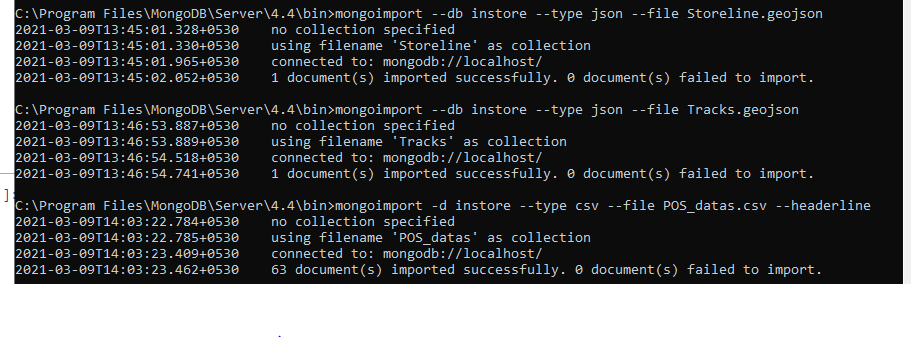